In [1]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [2]:
df_begin=pd.read_csv('D:\\KULIAH\\teep\AI\\dataset\\52 cells\\CellReports.csv')
df_begin

,timestamp,Viavi.Cell.Name,DRB.UEThpDl,DRB.UEThpUl,RRU.PrbUsedDl,RRU.PrbUsedUl,RRU.PrbAvailDl,RRU.PrbAvailUl,RRU.PrbTotUl,RRU.PrbTotDl,RRU.MaxLayerDlMimo,CARR.AverageLayersDl,RRC.ConnMean,RRC.ConnMax,QosFlow.TotPdcpPduVolumeUl,QosFlow.TotPdcpPduVolumeDl,PEE.AvgPower,PEE.Energy
0,1672502400,S1/B2/C1,0.278192,0.278192,81.459016,81.459016,100,100,81.459016,81.459016,0.0,0.0,1.786885,2.311475,277.868853,277.868853,281.947679,0.004195
1,1672502400,S7/B2/C1,0.146310,0.146310,50.000000,50.000000,100,100,50.000000,50.000000,0.0,0.0,0.516667,1.316667,146.050000,146.050000,180.817352,0.002292
2,1672502400,S8/B2/C1,0.220303,0.220303,64.300000,64.300000,100,100,64.300000,64.300000,0.0,0.0,1.450000,3.966667,220.083333,220.083333,230.893458,0.004631
3,1672502400,S9/B2/C1,0.186428,0.186428,80.900000,80.900000,100,100,80.900000,80.900000,0.0,0.0,1.916667,6.900000,186.083333,186.083333,279.584476,0.005326
4,1672502400,S1/B13/C1,0.000000,0.000000,0.000000,0.000000,75,75,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,18.250000,0.000360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524206,1673107140,S3/N77/C2,0.000000,0.000000,0.000000,0.000000,273,273,0.000000,0.000000,0.0,0.0,0.000000,4.000000,0.000000,0.000000,21.000000,11.000064
524207,1673107140,S3/N77/C3,0.000000,0.000000,0.000000,0.000000,273,273,0.000000,0.000000,0.0,0.0,0.000000,2.000000,0.000000,0.000000,21.000000,7.609575
524208,1673107140,S4/N77/C1,0.000000,0.000000,0.000000,0.000000,273,273,0.000000,0.000000,0.0,0.0,0.000000,3.000000,0.000000,0.000000,21.000000,7.789410
524209,1673107140,S4/N77/C2,0.000000,0.000000,0.000000,0.000000,273,273,0.000000,0.000000,0.0,0.0,0.000000,5.000000,0.000000,0.000000,21.000000,18.617635


In [3]:
df_1=df_begin[['timestamp', 'RRU.MaxLayerDlMimo','PEE.AvgPower', 'RRU.PrbUsedDl', 'RRU.PrbUsedUl']].copy()
convert_time=pd.to_datetime(df_1['timestamp'], unit='s',origin='unix')
df_1.insert(df_1.columns.get_loc('timestamp') + 1, 'datetime_column', convert_time)
df_1.set_index('datetime_column', inplace=True)
df_1.drop(columns=['timestamp'], inplace=True)

In [4]:
try:
    df_2= df_1.resample('T').max().drop(columns=['Viavi.Cell.Name'])
except:
    df_2= df_1.resample('T').max()
df_2

,RRU.MaxLayerDlMimo,PEE.AvgPower,RRU.PrbUsedDl,RRU.PrbUsedUl
datetime_column,,,,
2022-12-31 16:00:00,0.500000,327.670502,125.483333,118.30
2022-12-31 16:01:00,0.483333,337.544902,125.983333,122.85
2022-12-31 16:02:00,0.483333,340.634705,123.616667,113.75
2022-12-31 16:03:00,0.450000,340.634705,120.216667,109.20
2022-12-31 16:04:00,0.550000,336.958906,150.150000,145.60
...,...,...,...,...
2023-01-07 15:55:00,0.600000,327.670502,163.800000,150.15
2023-01-07 15:56:00,0.400000,340.634705,109.200000,104.65
2023-01-07 15:57:00,0.500000,340.634705,136.500000,136.50


In [5]:
df=df_2.astype(float).copy()

In [6]:
date_time =df.index
timestamp_s = date_time.map(pd.Timestamp.timestamp)
timestamp_s

Index([1672502400.0, 1672502460.0, 1672502520.0, 1672502580.0, 1672502640.0,
       1672502700.0, 1672502760.0, 1672502820.0, 1672502880.0, 1672502940.0,
       ...
       1673106600.0, 1673106660.0, 1673106720.0, 1673106780.0, 1673106840.0,
       1673106900.0, 1673106960.0, 1673107020.0, 1673107080.0, 1673107140.0],
      dtype='float64', name='datetime_column', length=10080)

In [7]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

In [8]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

In [9]:
train_df

,RRU.MaxLayerDlMimo,PEE.AvgPower,RRU.PrbUsedDl,RRU.PrbUsedUl
datetime_column,,,,
2022-12-31 16:00:00,-0.483023,-1.934206,-0.896380,-0.832377
2022-12-31 16:01:00,-0.590165,0.056314,-0.882660,-0.702789
2022-12-31 16:02:00,-0.590165,0.679168,-0.947603,-0.961965
2022-12-31 16:03:00,-0.804450,0.679168,-1.040900,-1.091552
2022-12-31 16:04:00,-0.161595,-0.061814,-0.219514,-0.054851
...,...,...,...,...
2023-01-05 13:31:00,-1.768734,0.679168,-1.595656,-1.353576
2023-01-05 13:32:00,0.374118,0.679168,0.404757,0.463500
2023-01-05 13:33:00,-0.483023,-1.934206,-0.594077,-0.314026


In [10]:
class WindowGenerator():
  # Constructor with parameters for window configuration and dataframes for training, validation, and testing
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df  # Training data
    self.val_df = val_df      # Validation data
    self.test_df = test_df    # Testing data
    print(label_columns)
    # Work out the label column indices.
    self.label_columns = label_columns  # Names of columns to be used as labels
    if label_columns is not None:
      # Create a dictionary mapping label names to their indices in the dataframe
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    # Create a dictionary mapping all column names to their indices in the dataframe
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width  # Number of time steps used as input
    self.label_width = label_width  # Number of time steps to be predicted
    self.shift = shift  # Number of time steps to shift the window

    # Calculate the total size of the window, including input and prediction steps
    self.total_window_size = input_width + shift

    # Define the slice of indices for the input features
    self.input_slice = slice(0, input_width)
    # Generate a range of indices for the input features within the window
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    # Calculate the start index for the labels
    self.label_start = self.total_window_size - self.label_width
    #print(self.label_start)
    # Define the slice of indices for the labels
    self.labels_slice = slice(self.label_start, None)
    print(self.labels_slice)
    # Generate a range of indices for the labels within the window
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]
    print(self.label_indices)

  # Representation method to display window parameters
  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',  # Display total window size
        f'Input indices: {self.input_indices}',          # Display indices used for input
        f'Label indices: {self.label_indices}',          # Display indices used for labels
        f'Label column name(s): {self.label_columns}'])  # Display names of label columns

In [11]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  print("self.label_columns ada gak:", self.label_columns)
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [12]:
# Define the plot method for the WindowGenerator class
def plot(self, model=None, plot_col='RRU.PrbUsedUl', max_subplots=3):
  # Retrieve example input and labels from the instance
  inputs, labels = self.example
  # Set up the figure size for plotting
  plt.figure(figsize=(12, 8))
  # Find the index of the column to plot
  plot_col_index = self.column_indices[plot_col]
  # Determine the number of subplots to create, limited by max_subplots
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    # Create a subplot for each input example up to max_n
    plt.subplot(max_n, 1, n+1)
    # Set the label for the y-axis
    plt.ylabel(f'{plot_col} [normed]')
    # Plot the input data for the selected column
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    # Check if label_columns is specified, to find the corresponding label column index
    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      # If not specified, use the same index as the input column
      label_col_index = plot_col_index

    # Skip plotting labels if the column index is not found
    if label_col_index is None:
      continue

    # Plot the labels data as scatter plot
    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    # If a model is provided, use it to make predictions and plot them
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    # Add a legend to the first subplot only for clarity
    if n == 0:
      plt.legend()

  # Set the label for the x-axis
  plt.xlabel('Time [h]')

# Assign the plot method to the WindowGenerator class
WindowGenerator.plot = plot

In [13]:
np.array(train_df, dtype=np.float32).shape

(7056, 4)

In [14]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  tf.random.set_seed(0)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,
      seed=0)
  print(ds)
  print("YANG ATAS SebELUM SPLIT_WINDOW")
  ds = ds.map(self.split_window)
  print("make_dataset ini:")
  print(ds)
  return ds

WindowGenerator.make_dataset = make_dataset

In [15]:
@property
def train(self):
  print("trainnnnnnnnnnnnn")
  return self.make_dataset(self.train_df)

@property
def val(self):
  print("asasfsfd")
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [16]:
MAX_EPOCHS = 30

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [17]:
OUT_STEPS = 10
multi_window = WindowGenerator(input_width=180,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS)


#multi_window

None
slice(180, None, None)
[180 181 182 183 184 185 186 187 188 189]


In [18]:
import tensorflow as tf

# Assuming `multi_window.train` is a TensorFlow dataset
for batch in multi_window.train.take(1):  # Adjust the number inside take() for more batches
    inputs, targets = batch
    print("Inputs:", inputs.numpy().shape)  # Convert tensors to numpy arrays for readability
    print("Targets:", targets.numpy().shape)

trainnnnnnnnnnnnn
<BatchDataset element_spec=TensorSpec(shape=(None, None, 4), dtype=tf.float32, name=None)>
YANG ATAS SebELUM SPLIT_WINDOW
self.label_columns ada gak: None
make_dataset ini:
<MapDataset element_spec=(TensorSpec(shape=(None, 180, 4), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10, 4), dtype=tf.float32, name=None))>
Inputs: (32, 180, 4)
Targets: (32, 10, 4)


In [19]:
for batch in multi_window.train.take(1):  # Adjust the number inside take() for more batches
    inputs, targets = batch
    print("Inputs:", inputs.numpy())  # Convert tensors to numpy arrays for readability
    print("Targets:", targets.numpy())

trainnnnnnnnnnnnn
<BatchDataset element_spec=TensorSpec(shape=(None, None, 4), dtype=tf.float32, name=None)>
YANG ATAS SebELUM SPLIT_WINDOW
self.label_columns ada gak: None
make_dataset ini:
<MapDataset element_spec=(TensorSpec(shape=(None, 180, 4), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10, 4), dtype=tf.float32, name=None))>
Inputs: [[[-1.2330209e+00 -1.9342058e+00 -1.5101333e+00 -1.5149671e+00]
  [-2.6873729e-01 -6.0949600e-01 -5.5566072e-01 -1.8443878e-01]
  [-3.7587991e-01  6.7916763e-01 -1.0934948e+00 -3.1402645e-01]
  ...
  [ 3.7411848e-01 -1.9342058e+00  4.0475723e-01  3.3391187e-01]
  [ 1.2312595e+00  6.7916763e-01  1.4035919e+00  1.2410256e+00]
  [ 8.0268902e-01  6.7916763e-01  9.0417457e-01  9.8185021e-01]]

 [[-1.3401636e+00 -3.9471871e-01 -1.6413903e+00 -1.4010438e+00]
  [ 1.1241169e+00  6.7916763e-01  1.2604439e+00  1.3706132e+00]
  [-1.9830194e+00  6.7916763e-01 -1.5956562e+00 -1.3535758e+00]
  ...
  [ 1.7669727e+00  5.6313548e-02  1.8956918e+00 -1.3507277e

asasfsfd
<BatchDataset element_spec=TensorSpec(shape=(None, None, 4), dtype=tf.float32, name=None)>
YANG ATAS SebELUM SPLIT_WINDOW
self.label_columns ada gak: None
make_dataset ini:
<MapDataset element_spec=(TensorSpec(shape=(None, 180, 4), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10, 4), dtype=tf.float32, name=None))>
58/58 [==============================] - 0s 6ms/step - loss: 0.9765 - mean_absolute_error: 0.8050
<BatchDataset element_spec=TensorSpec(shape=(None, None, 4), dtype=tf.float32, name=None)>
YANG ATAS SebELUM SPLIT_WINDOW
self.label_columns ada gak: None
make_dataset ini:
<MapDataset element_spec=(TensorSpec(shape=(None, 180, 4), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10, 4), dtype=tf.float32, name=None))>
trainnnnnnnnnnnnn
<BatchDataset element_spec=TensorSpec(shape=(None, None, 4), dtype=tf.float32, name=None)>
YANG ATAS SebELUM SPLIT_WINDOW
self.label_columns ada gak: None
make_dataset ini:
<MapDataset element_spec=(TensorSpec(shape=(None, 18

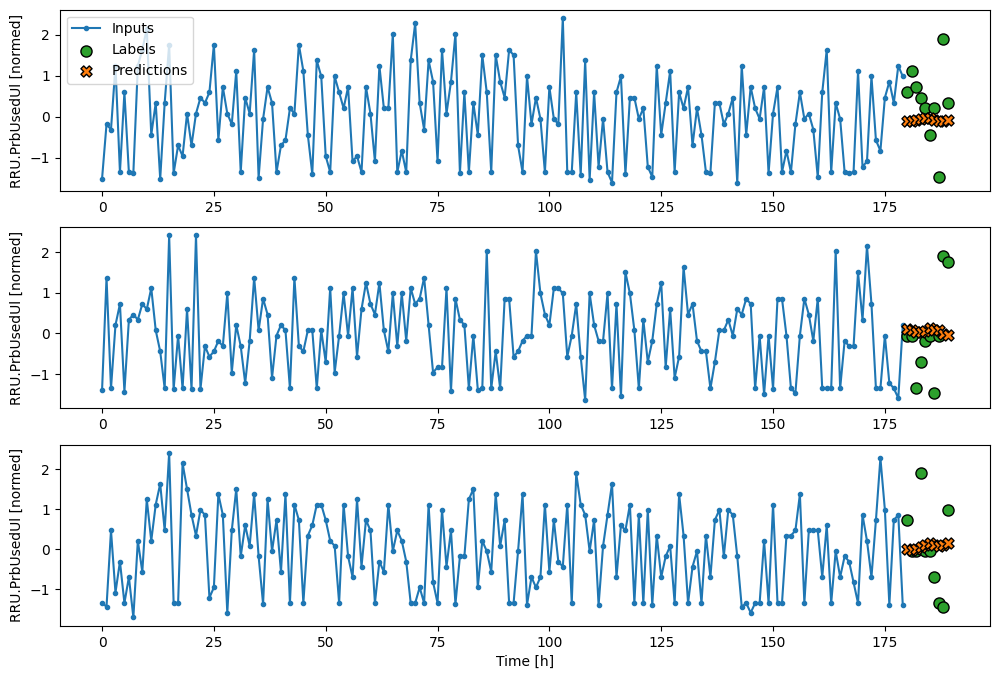

In [20]:
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units].
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(32, return_sequences=False),
    # Shape => [batch, out_steps*features].
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features].
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_lstm_model, multi_window)

IPython.display.clear_output()
multi_val_performance = {}
multi_performance = {}

multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val, return_dict=True)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.test, verbose=0, return_dict=True)
multi_window.plot(multi_lstm_model)